In [28]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plot
from sklearn.impute import SimpleImputer
import missingno as mano
import statsmodels.api as sm
from scipy.stats import norm
import pylab
from scipy.stats import kstest, norm
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

C:\Users\Hp\Anaconda3\anaconda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\Hp\Anaconda3\anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Hp\Anaconda3\anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, whic

In [2]:
def loading_data():
    filename = input("Please enter file name with extension : ")
    filetype = filename.split(".")
    if filetype[-1] == "xlsx":
        data = pd.read_excel(filename)
    else:
        data = pd.read_csv(filename)
    return data

data = loading_data()

Please enter file name with extension : data.csv


In [3]:
def data_info(n):
    dimensions = data.shape
    print ("Shape of the data is :",dimensions)
    print ("Number of rows :", dimensions[0])
    print ("Number of columns :", dimensions[1])
    
    #print ("\n")
    print ("\n Columns Types:\n",data.dtypes)
    
    print ("\nThe first",n,"rows of the data are:\n",data.head(n))
    print ("\nThe last",n,"rows of the data are:\n",data.tail(n))
    print (data.info())

data_info(5)

Shape of the data is : (6819, 96)
Number of rows : 6819
Number of columns : 96

 Columns Types:
 Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
 Realized Sales Gross Margin                                float64
 Operating Profit Rate                                      float64
 Pre-tax net Interest Rate                                  float64
 After-tax net Interest Rate                                float64
 Non-industry income and expenditure/revenue                float64
 Continuous interest rate (after tax)                       float64
 Operating Expense Rate                                     float64
 Research and development expense rate                      float64
 Cash flow rate    

In [4]:
def missing_values():
    data.isnull()
    data.replace(' ',np.nan, inplace=True)
    print (data.isnull().sum())
    
missing_values()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Val

In [5]:
#CHECK ERROR VALUES
def error_values():
    temp = data.copy()
    for cols in temp.columns:
        temp[cols]=pd.to_numeric(temp[cols], errors='coerce') 
    temp.info()
    print (temp.describe().T)
    #return temp

error_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
Bankrupt?                                                   6819 non-null int64
 ROA(C) before interest and depreciation before interest    6819 non-null float64
 ROA(A) before interest and % after tax                     6819 non-null float64
 ROA(B) before interest and depreciation after tax          6819 non-null float64
 Operating Gross Margin                                     6819 non-null float64
 Realized Sales Gross Margin                                6819 non-null float64
 Operating Profit Rate                                      6819 non-null float64
 Pre-tax net Interest Rate                                  6819 non-null float64
 After-tax net Interest Rate                                6819 non-null float64
 Non-industry income and expenditure/revenue                6819 non-null float64
 Continuous interest rate (after tax)                       6819 non-null f

In [6]:
def num_col_analysis():
    
    global data
    
    data1 = pd.DataFrame(data)
    
    data1.hist(figsize=(20,20), bins = 30)
    plot.show()
    
    
    data1 = norm.rvs(size=1000)
    sm.qqplot(data1, line='45')
    pylab.show()
    
    print ("Kolmogorov Smirnov test")
    data1 = norm.rvs(size=1000)
    ks_statistic, p_value = kstest(data1, 'norm')
    print(ks_statistic, p_value)
    if p_value > 0.05:
        print ("Normal Distribution")
    else:
        print ("Data is not normally distributed")
        
    print ("Shapiro Wilk test")   
    data1 = norm.rvs(size=500)
    stat, p = shapiro(data1)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print("Fail to reject H0 that is data is normal distributed")
    else:
        print("Reject H0 that is data is normally distributed")    

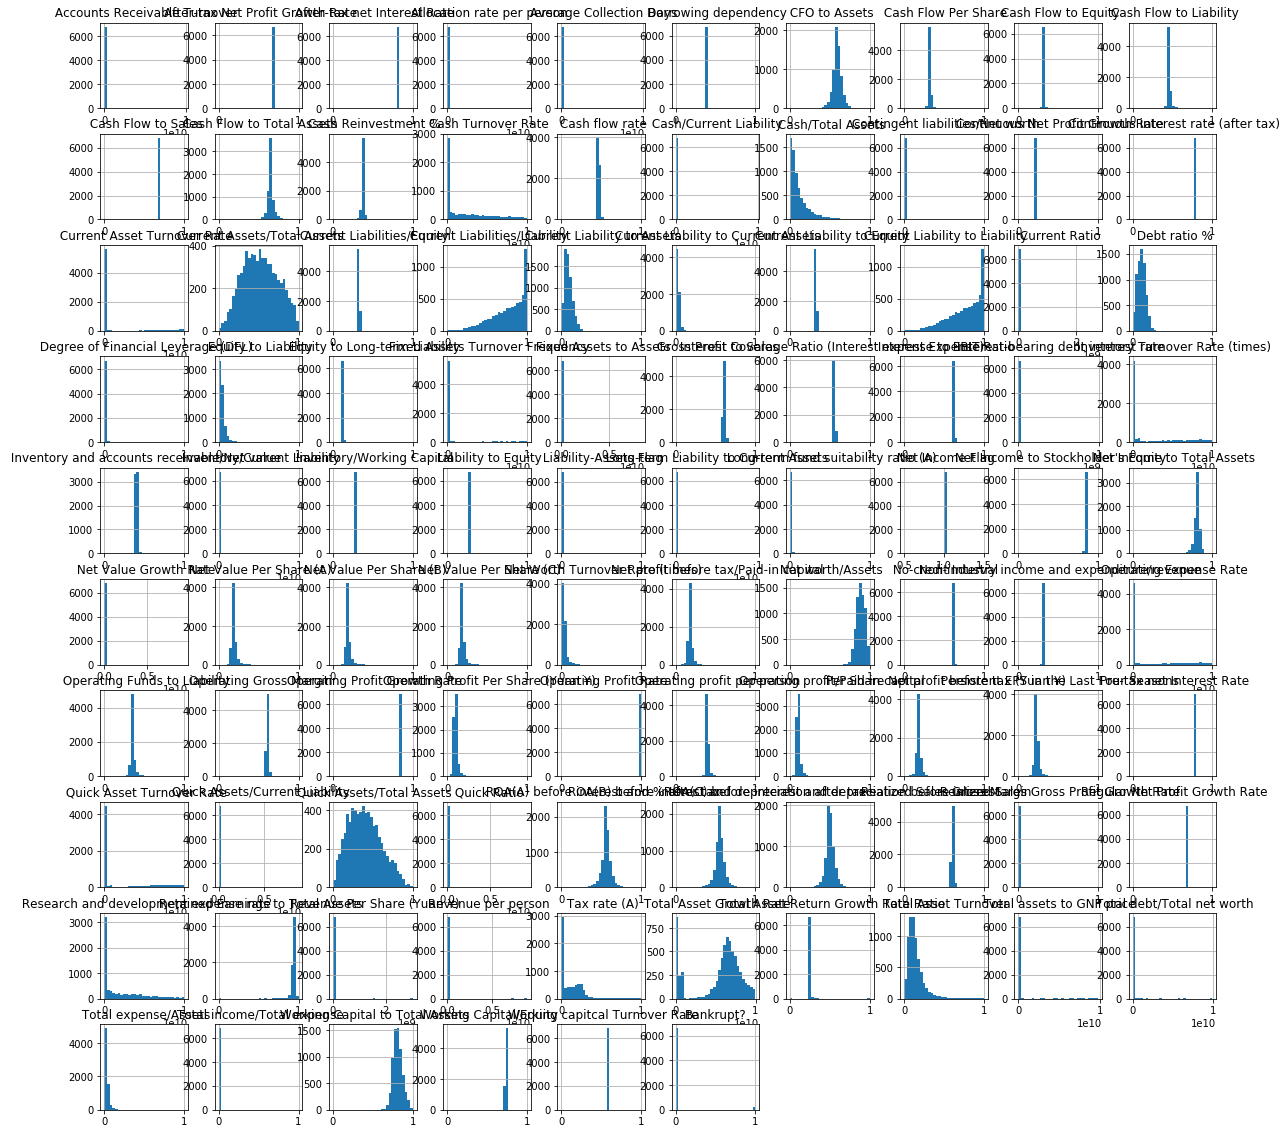

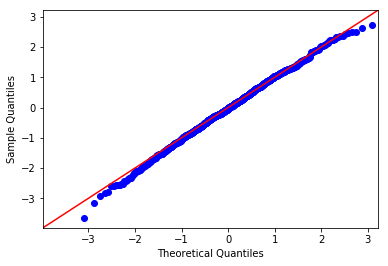

Kolmogorov Smirnov test
0.042963326561089143 0.04841731341131708
Data is not normally distributed
Shapiro Wilk test
Statistics=0.997, p=0.379
Fail to reject H0 that is data is normal distributed


In [7]:
num_col_analysis()


In [8]:
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
5,1,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,...,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,1,0.019534
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801


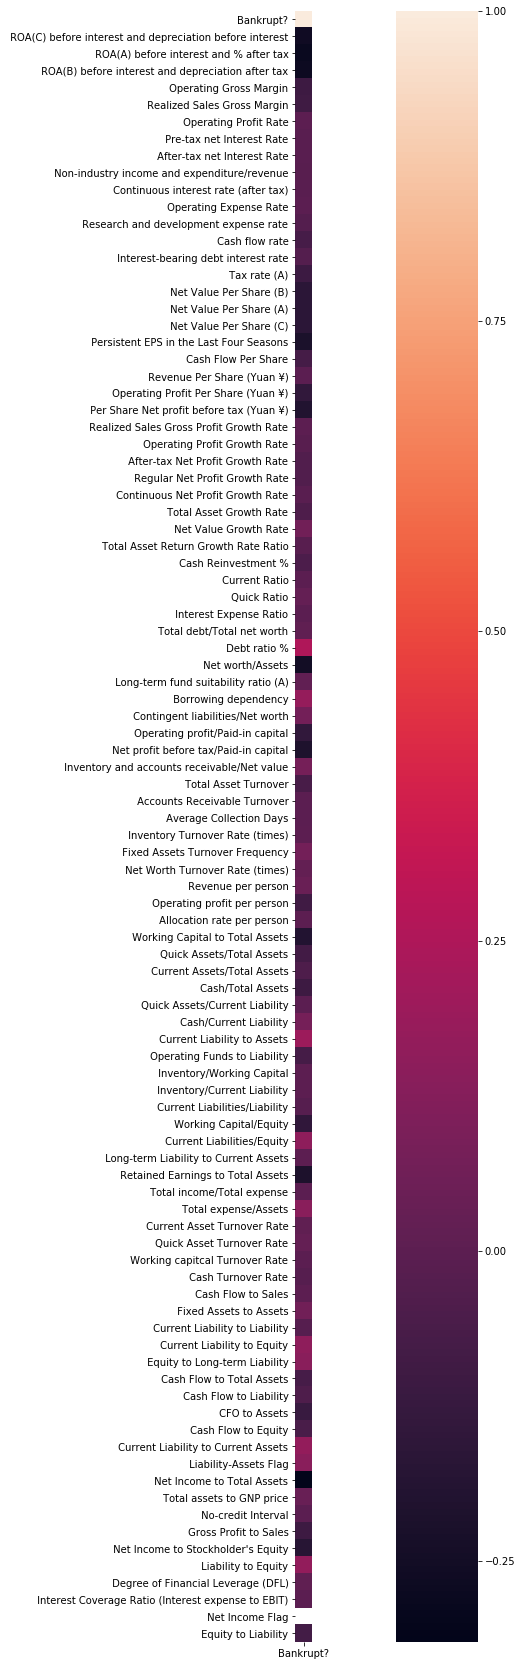

In [9]:
correlation = data.corr()[['Bankrupt?']]
plot.subplots(figsize=(30,30))
sns.heatmap(correlation,square=True,fmt="")

plot.show()

In [10]:
correlation.sort_values(by=['Bankrupt?'],ascending=False)

,Bankrupt?
Bankrupt?,1.000000
Debt ratio %,0.250161
Current Liability to Assets,0.194494
Borrowing dependency,0.176543
Current Liability to Current Assets,0.171306
Liability to Equity,0.166812
Current Liabilities/Equity,0.153828
Current Liability to Equity,0.153828
Liability-Assets Flag,0.139212
Total expense/Assets,0.139049


In [12]:
def del_column():
    n = int(input("How many columns you want to drop? "))
    for i in range(0,n):
        column_name = input("Enter column name : ")
        data.columns = data.columns.str.strip()
        data.drop([column_name], axis=1, inplace=True)
    return data

del_column()

How many columns you want to drop? 1
Enter column name : Net Income Flag


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490
5,1,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,...,0,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,0.019534
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,0.030801


In [13]:
print(data['Bankrupt?'].value_counts())

0    6599
1     220
Name: Bankrupt?, dtype: int64


C:\Users\Hp\Anaconda3\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


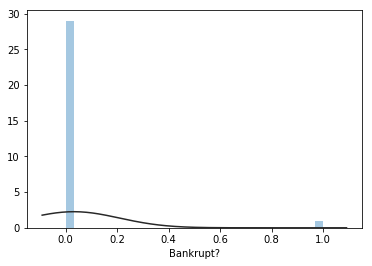

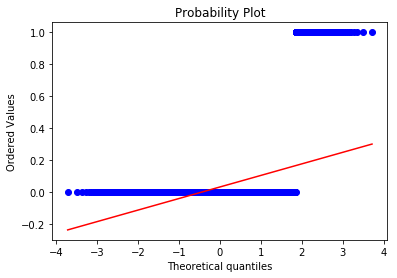

In [33]:
X = data.copy() 
Y = data['Bankrupt?']
X = X.drop(['Bankrupt?'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1234)

sns.distplot(Y,kde=False,fit=norm,bins=30)
plot.show()
stats.probplot(Y, dist="norm", plot=pylab)
plot.show() 

In [36]:
sm = SMOTE(random_state=1234)
X_smote, Y_smote = sm.fit_sample(X_train, Y_train)
#Y_smote.value_counts(normalize=True) * 100

C:\Users\Hp\Anaconda3\anaconda\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
C:\Users\Hp\Anaconda3\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


C:\Users\Hp\Anaconda3\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


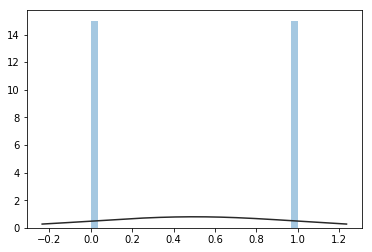

In [37]:
sns.distplot(Y_smote,kde=False,fit=norm,bins=30)
plot.show()

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_smote)
X_smote = scaler.transform(X_smote)
X_test = scaler.transform(X_test)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_smote, Y_smote)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
y_pred = classifier.predict(X_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(Y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(Y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[1194  130]
 [  13   27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1324
           1       0.17      0.68      0.27        40

    accuracy                           0.90      1364
   macro avg       0.58      0.79      0.61      1364
weighted avg       0.97      0.90      0.92      1364

Accuracy: 0.8951612903225806
